In [41]:
import pandas as pd
import numpy as np


p_values = [0.5, 1, 2, 5, float('inf')]
k = [2, 3, 4, 5] + list(range(10, 101, 10))
print("the dimensions k: ", k, "   len", len(k))

q = 3  # Number of data sets
n = 10  # Number of points per set

def generate_random_points(dimension_k):
   data_sets = []
   # excluding 0 with a small value
   for _ in range(q):
    data_sets.append(np.random.uniform(0.001, 1, (n, dimension_k)))
   return data_sets 


data_sets_for_k2 = generate_random_points(2)
data_set_1 = data_sets_for_k2[0] 
# print("data_set_1", data_set_1)
# print("data_set_1_0", data_set_1[0])



the dimensions k:  [2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]    len 14


In [34]:

def lp_norm_origin(data_set, p):
   norms = [0] * len(data_set)
   if p == float('inf'):
      for i, coordinate in enumerate(data_set):
            norms[i] += np.max(np.abs(coordinate))
      return norms
   else:
      for i, coordinate in enumerate(data_set):
         for j, feature in enumerate(coordinate): 
            norms[i] += np.pow(feature, p)
      return_value = np.power(norms,1/p)
      assert(len(return_value) == len(data_set))
      return return_value




#test: 
# lp_norm_origin_forp2 = lp_norm_origin(data_set_1, p= 2)
# print(len(lp_norm_origin_forp2))

# print("lp_norm_origin_forp2", lp_norm_origin_forp2)


def relative_contrast(dist_data):
   return (max(dist_data) - min(dist_data)) / min(dist_data)




# Assuming you need to calculate some deviation based on pairwise distances
# Here the script provided was incomplete, so let's assume you want to accumulate distances for some statistic.
def variance(data_set):
   sum_part = 0
   for distance in data_set:
         sum_part += (distance - np.mean(data_set)) ** 2 
   std_dev_sample  = np.sqrt(((1/ (len(data_set) - 1)) * sum_part))
   return std_dev_sample



# print("std_dev_sample: ", variance(lp_norm_origin_forp2))

def calculate_statistics(data_sets, p):
   statistics = []
   for data_set in data_sets:
      distances_per_dset = lp_norm_origin(data_set, p)
      stat_row = {
         'min': min(distances_per_dset),
         'max': max(distances_per_dset),
         'mean': np.mean(distances_per_dset), 
         'variance': variance(distances_per_dset),
         'relative contrast': relative_contrast(distances_per_dset)
      }
      statistics.append(stat_row)
   return pd.DataFrame(statistics)

def loop_norms(p):
    for norm in p:
        print("for p norm ", norm, "\n", calculate_statistics(data_sets=data_sets_for_k2, p=norm))

loop_norms(p_values)




for p norm  0.5 
         min       max      mean  variance  relative contrast
0  0.786516  2.502596  1.698932  0.591511           2.181874
1  1.232467  2.576874  1.964862  0.450732           1.090826
2  0.734193  3.509568  2.052186  1.027760           3.780168
for p norm  1 
         min       max      mean  variance  relative contrast
0  0.416999  1.313489  0.911164  0.307025           2.149858
1  0.689806  1.305433  1.030757  0.208768           0.892465
2  0.485501  1.757363  1.104679  0.443877           2.619690
for p norm  2 
         min       max      mean  variance  relative contrast
0  0.324988  1.009091  0.714425  0.245261           2.105012
1  0.487778  1.019546  0.783804  0.155161           1.090186
2  0.452534  1.246279  0.854327  0.260647           1.754001
for p norm  5 
         min       max      mean  variance  relative contrast
0  0.305528  0.968087  0.663140  0.238660           2.168570
1  0.396226  0.997146  0.702959  0.158241           1.516607
2  0.451235  1.0209

In [44]:
# Question 4



def calculate_aggregate_statistics(p):

   aggr_statistics = []
   for dimension in k:
      data_sets = generate_random_points(dimension)

      statistics = []
      for data_set in data_sets:
         distances_per_dset = lp_norm_origin(data_set, p)
         stat_row = {
            'Min(Lp)': distances_per_dset.min(),
            'Max(Lp)': distances_per_dset.max(),
            'Avg(Lp)': np.mean(distances_per_dset), 
            'Var(Lp)': variance(distances_per_dset),
            'Ctr(Lp)': relative_contrast(distances_per_dset)
         }
         statistics.append(stat_row)
      aggr_statistics.append(pd.DataFrame(statistics).mean())
   return pd.DataFrame(aggr_statistics)


calculate_aggregate_statistics(2) 

,Min(Lp),Max(Lp),Avg(Lp),Var(Lp),Ctr(Lp)
0,0.224142,1.158894,0.784886,0.300243,7.185316
1,0.412044,1.346623,0.932633,0.295935,2.610136
2,0.788989,1.515141,1.155221,0.230590,0.942192
3,0.758416,1.629716,1.220987,0.282012,1.250863
4,1.126749,2.197045,1.715858,0.354869,0.947134
5,2.191924,2.939380,2.586487,0.256762,0.343042
6,2.857239,3.549363,3.246624,0.211570,0.242243
7,3.399459,3.913791,3.653500,0.176540,0.151740
8,3.695133,4.375429,4.099039,0.217510,0.189051
9,3.986119,4.855122,4.430687,0.275992,0.218416


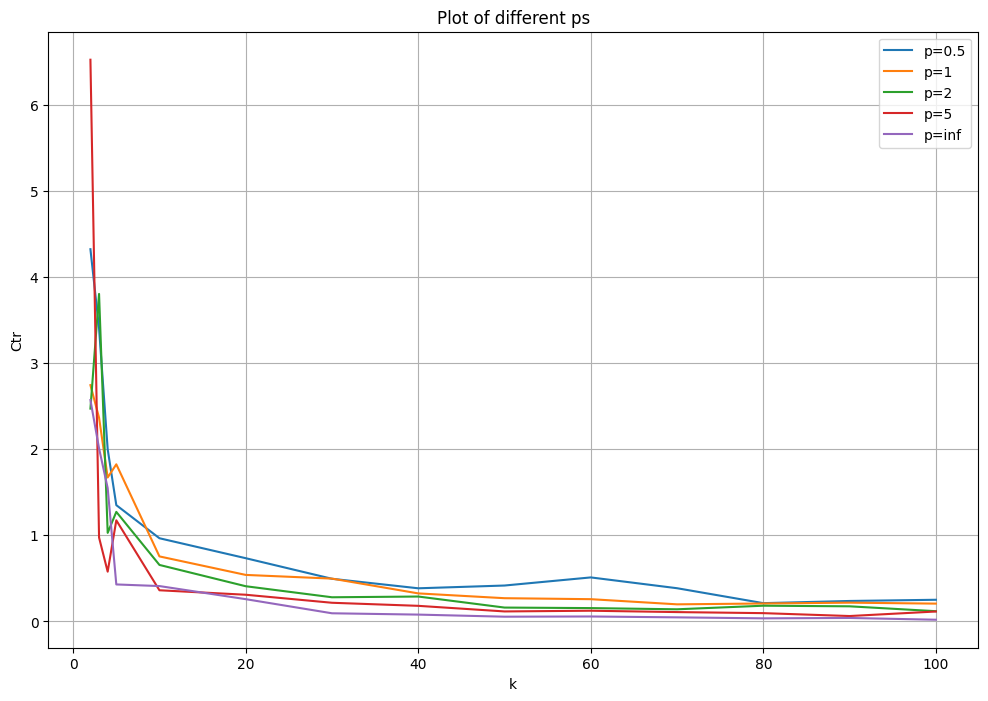

In [52]:
# Question 5 a)
import matplotlib.pyplot as plt

def calulate_ctrst(p):
   aggr_statistics = []
   for dimension in k:
      data_sets = generate_random_points(dimension)

      statistics = []
      for data_set in data_sets:
         distances_per_dset = lp_norm_origin(data_set, p)
         stat_row = {
            'Ctr(Lp)': relative_contrast(distances_per_dset)
         }
         statistics.append(stat_row)
      aggr_statistics.append(pd.DataFrame(statistics).mean())
   return pd.DataFrame(aggr_statistics)


def stats_for_norms(p):

   for norm in p: 
      plt.plot(k, calulate_ctrst(norm)['Ctr(Lp)'].values,  label=f'p={norm}')
   # Adding labels and title
   plt.xlabel('k')
   plt.ylabel('Ctr')
   plt.title('Plot of different ps')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()


stats_for_norms(p_values)

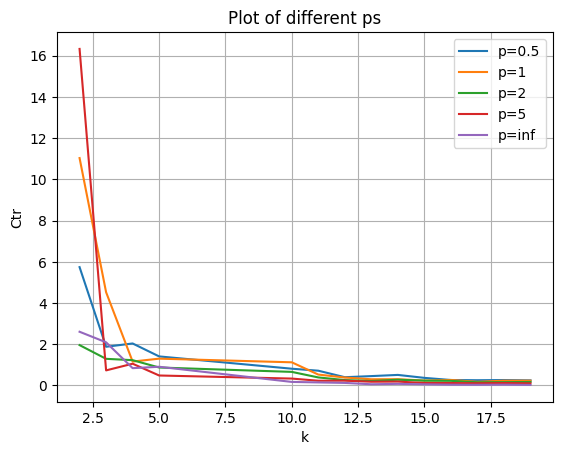

In [56]:
# alternative scaling
k_simple =  [2, 3, 4, 5] + list(range(10, 20, 1))

def stats_for_norms(p):

   for norm in p: 
      plt.plot(k_simple, calulate_ctrst(norm)['Ctr(Lp)'].values,  label=f'p={norm}')
   # Adding labels and title
   plt.xlabel('k')
   plt.ylabel('Ctr')
   plt.title('Plot of different ps')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()


stats_for_norms(p_values)

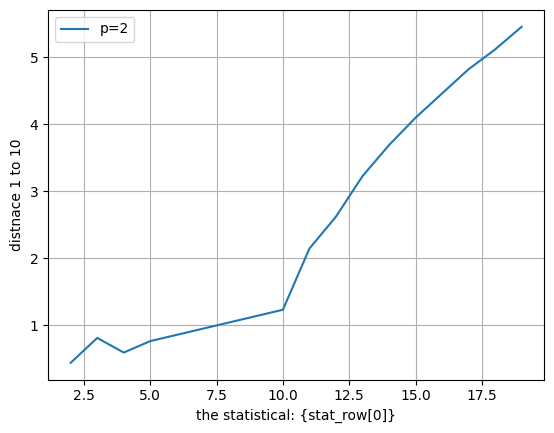

In [60]:
# Question 5 b)

def calculate_any_stat(p, string_stat):
   aggr_statistics = []
   for dimension in k:
      data_sets = generate_random_points(dimension)

      statistics = []
      for data_set in data_sets:
         distances_per_dset = lp_norm_origin(data_set, p)
         stat_row = {
            'Min(Lp)': distances_per_dset.min(),
            'Max(Lp)': distances_per_dset.max(),
            'Avg(Lp)': np.mean(distances_per_dset), 
            'Var(Lp)': variance(distances_per_dset),
            'Ctr(Lp)': relative_contrast(distances_per_dset)
         }
         statistics.append(stat_row[string_stat])
      aggr_statistics.append(pd.DataFrame(statistics).mean())
   return pd.DataFrame(aggr_statistics)

def stats_for_norms_all(p):
   stat_row = [
      'Min(Lp)',
      'Max(Lp)',
      'Avg(Lp)', 
      'Var(Lp)',
      'Ctr(Lp)'
   ]
   x = plt.plot(k_simple, calculate_any_stat(p, stat_row[0]),  label=f'{stat} for p={p}')
   # Adding labels and title
   y = range(1, 11)  # This creates a range from 1 to 10
   plt.xlabel('the statistical: {stat_row[0]}')
   plt.ylabel('distnace 1 to 10')
   plt.title('')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()

stats_for_norms_all(2)

In [ ]:
# additional thingies


def stats_for_norms_all(p):
   stat_row = {
      'Min(Lp)',
      'Max(Lp)',
      'Avg(Lp)', 
      'Var(Lp)',
      'Ctr(Lp)'
   }
   for stat in stat_row:
      y = plt.plot(k_simple, calculate_any_stat(p, 'Ctr(Lp)'),  label=f'p={p}')
   # Adding labels and title
   plt.xlabel('k')
   plt.ylabel('Ctr')
   plt.title('')
   plt.legend()  # Show the legend

   # Grid
   plt.grid(True)

   # Show the plot
   plt.show()

stats_for_norms_all(p_values)
